In [22]:
# fonction de répartition = primitive de fonction de densité

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import decimal
sns.set_style('darkgrid', {'legend.frameon':True})
# $\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$

# Functions

Table de la lois normale

https://fr.wikipedia.org/wiki/Loi_normale#Tables_num%C3%A9riques_et_calculs

In [2]:
def normale_center(x, mu, sig):
    return (x-mu)/sig

$P(X=x)=e^{-\lambda}\frac{\lambda^x}{x!}$

In [3]:
def poisson(x, la):
    return np.exp(-la)*float(decimal.Decimal(la**x)/decimal.Decimal(np.math.factorial(x)))

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})}$

In [4]:
def normale(x, mu, sig):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-.5*((x-mu)/sig)**2)

# Exercice 1

    Le nombre d’erreurs effectuées par un individu au cours d’une période de quatre heures, affecté à la
    saisie de données dans une entreprise de service est distribué selon la loi de probabilité ci-contre.

|Nombre d'erreurs $x_i$|$P(X=x_i)$|
|--|--|
|0|0.30|
|1|0.25|
|2|0.18|
|3|0.14|
|4|0.10|
|5|?|

### 1. Déterminez la probabilité manquante

La somme des probabilités du tableau doit être égale à 1
    
$P(X=5) = 1-0.30-0.25-0.18-0.14-0.10 = .03$

### 2. Déterminez la fonction de répartition

|Nombre d'erreurs $x_i$|$P(X<x_i)$|
|--|--|
|0|0|
|1|0.30|
|2|0.55|
|3|0.73|
|4|0.87|
|5|0.97|


# Exercice 2 

    Le responsable du comité de sécurité de l’entreprise NICOM a effectué une compilation du nombre 
    d’accidents de travail qui se sont produits depuis 2 ans dans l’usine. Ceci a permis d’établir que le taux 
    moyen d’accidents de travail a été de 1.6 accident/jour.  

### 1. En admettant que le nombre d’accidents de travail en une journée obéit à la loi de Poisson, quelle est l’expression qui permettrait de calculer la probabilité d’observer x accidents de travail par jour ? 

$P(X=x)=e^{-\lambda}\frac{\lambda^x}{x!}$

### 2. Quel est l’écart-type de la variable aléatoire concernée ?

$\sigma = \sqrt{\lambda} = \sqrt{1.6}$

In [5]:
std = np.sqrt(1.6)
std

1.2649110640673518

### 3. Quelle est la probabilité d’observer plus de 2 accidents par jour ?

$1 - P(X<=2)$

In [6]:
P = 0
for x in range(3):
    P += poisson(x, 1.6)
P = 1 - P
P

0.21664151018073707

### 4. Tracez la distribution du nombre d’accidents par jour.

0.999992857708199


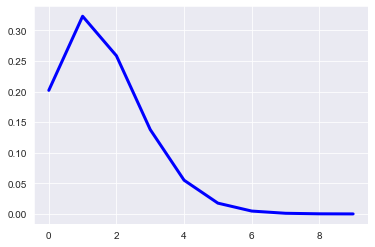

In [7]:
X, y = [], []
nbAccident = 10
for x in range(nbAccident):
    X.append(x)
    y.append(poisson(x, 1.6))
plt.plot(X, y, color='blue', linewidth=3)
print(np.sum(y))

### 5. Quel est le nombre d’accidents par jour qui est le plus probable et quelle en est sa probabilité ?

Graphiquement on peut lire que c'est 1 avec $P(X=1)\approx.35$ 

In [8]:
print('x : %s, y : %2f'%(X[y.index(np.max(y))], np.max(y)))

x : 1, y : 0.323034


# Exercice 3

    La firme Matrex se spécialise dans le développement de systèmes et de télétraitement ; elle recherche 
    des analystes capables d’effectuer la conception informatique d’algorithmes complexes dans le 
    domaine de la simulation et de la statistique. Cette firme fait subir d’abord aux postulants un test 
    d’aptitude dont les résultats sont distribués normalement avec espérance µ=73.2 et un écart type σ=8.
    La firme engage les postulants qui sont dans le 1% meilleur.

### 1. Quel est le résultat minimal avec lequel les postulants doivent réussir le test pour avoir la possibilité d’être engagés ?  

    On sait que le test d’aptitude est distribué normalement avec µ=73.2 et σ=8. 

En utilisant la table de lois normal centré réduitie. On trouve pour 0.9901 donc $\approx .01$ un résultat de $2.3 + 0.3=2.33$

Pour passer à une loi normale général on pose $P(Y\le \frac{x-\mu}{\sigma}) = 0.01$

donc :

$\frac{x-\mu}{\sigma} = 2.33$

$x=2.33\sigma+\mu=2.33\times8+73.2=91.84$

Donc le résultat minimal avec lequel les postulants doivent réussir le test est 91.84

### Quelque test (pour voir)

0.9994984221765622


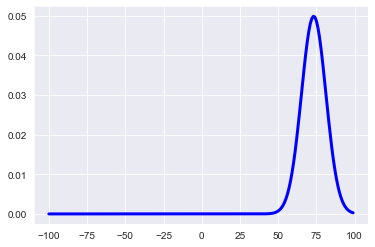

In [9]:
X = np.arange(-100,100)
y = normale(X, 73.2, 8)
print(np.sum(y))
plt.plot(X, y, color='blue', linewidth=3)

# Exercice 4 

    Sur une chaîne de production, un processus automatique fait que les pièces ayant une longueur inférieure à 9 cm ou supérieure à 11 cm sont éliminées. Sachant que la longueur des pièces est distribuée normalement de moyenne µ=10 cm et un écart-type σ=0.4 cm, combien doit-on fabriquer de pièces pour en avoir 1000 utilisables ? 

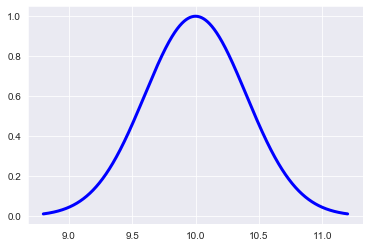

In [10]:
X = np.arange(10-.4*3, 10+.4*3, .001)
y = normale(X, 10, .4)
plt.plot(X, y, color='blue', linewidth=3)

$x\sim N(10,0.4)$

$y\sim N(0,1)$

$y=\frac{x-10}{0.4}$

$P(9 \le x \le 11) = P( \frac{9 - 10}{0.4} \le y \le \frac{11 - 10}{0.4})$

$x\times center = 1000$

$x = \frac{1000}{center}$

In [11]:
print('x = 9 : %s'%(normale_center(9, 10, .4)))
print('x = 9 : %s'%(normale_center(11, 10, .4)))
# la super table nous donne pour 2.5 (et donc -2.5) : .9938
print('le nombre de pièce nécéssaire pour en avoir 10000 correct est : %s'%np.ceil(1000/(.9938-(1-.9938))))

x = 9 : -2.5
x = 9 : 2.5
le nombre de pièce nécéssaire pour en avoir 10000 correct est : 1013.0


# Exercice 5

    La durée de vie d’une pièce mécanique est distribuée selon une loi exponentielle dont le taux moyen de défaillance est 0.002 pièces par heure de fonctionnement. 

pour x la durée de vie d'une pièce mécanique

$x \sim \varepsilon(\lambda) \sim \varepsilon(0.002), \lambda>0$

### 1. Quelle est l’expression de la loi de probabilité pour la variable aléatoire « durée de vie » ?   

$f(x)=\lambda e^{-\lambda x} 1_{x \le 0} = 0.002e^{-0.002 x} 1_{x \le 0}$

### 2. Quelle est la moyenne des temps de bon fonctionnement de cette pièce ?   

Pour calculer la moyenne on peut directement calcuer l'esperance

$E(x) = \frac{1}{\lambda} = \frac{1}{.002} = 500$

In [12]:
print('La moyenne est égale à : %s'%(1/.002))

La moyenne est égale à : 500.0


### 3. Quelle est la variance de la durée ?

$E(x) = \frac{1}{\lambda^2} = \frac{1}{.002^2} = 250000$

In [13]:
print('La variance est égale à : %s'%(1/(.002**2)))

La variance est égale à : 250000.0


### 4. Quelle est la probabilité que cette pièce survivra au-delà de son temps de bon fonctionnement ?

$P(x >= 500) = \int_{500}^{+\infty}0.002e^{-0.002 x}dx$

$P(x >= 500) = \int_{500}^{+\infty}0.002e^{-0.002 x}dx$

$P(x >= 500) = [-e^{-0.002 x}]_{500}^{+\infty}$

$P(x >= 500) = -e^{-0.002\times+\infty} -(-e^{-0.002\times500})$

$P(x >= 500) = -e^{-\infty} + e^{-1}$

$P(x >= 500) = 0 + e^{-1}$

$P(x >= 500) \approx 0.37$



In [14]:
print(
    'la probabilité que cette pièce survivra au-delà de son temps de bon fonctionnement est %s'%
    np.exp(-0.002*500))

la probabilité que cette pièce survivra au-delà de son temps de bon fonctionnement est 0.36787944117144233


### 5. Quelle est la probabilité que cette pièce dure au moins un autre 200heures sachant qu’elle fonctionne depuis au moins 500 heures ? 

$P(x >= 700) = \int_{700}^{+\infty}0.002e^{-0.002 x}dx$

$P(x >= 700) = \int_{700}^{+\infty}0.002e^{-0.002 x}dx$

$P(x >= 700) = [-e^{-0.002 x}]_{700}^{+\infty}$

$P(x >= 700) = -e^{-0.002\times+\infty} -(-e^{-0.002\times700})$

$P(x >= 700) = -e^{-\infty} + e^{-1.4}$

$P(x >= 700) = 0 + e^{-1.4}$

$P(x >= 700) \approx 0.25$

In [15]:
print(
    'la probabilité que cette pièce survivra au-delà de son temps de bon fonctionnement est %s'%
    np.exp(-0.002*700))

la probabilité que cette pièce survivra au-delà de son temps de bon fonctionnement est 0.24659696394160643


# Exercice 6

    Le temps jusqu’à défaillance d’un composant électronique est distribué selon une loi log-normale avec 
    E(X) = 250 heures et var(X) = 102 400 heures².

Pour X le temps judqu'à la défaillance d’un composant électronique.

$x\sim LN(250, 102400)\hspace{1cm}y \sim N(250, 102400)\hspace{1cm}z \sim N(1,0)$

### 1. Quelles est la probabilité que ce composant soit défaillant avant 175 heures ?

Pour passer d'une loi log normale a une loi normale on utilise le log népérien : ln

$P(Y \le y) = ln(x)$ 

Passage à une loi normale centrée réduite

$P(Z \le z) = \frac{Y-\mu}{\sigma}$

Application :

$P(X \le 175) = P(Y \le ln(175)) = P(Z \le \frac{ln(175) - 250}{\sqrt(102400)}) = P(Z \le -0.765)$

On utilise la table pour trouver la valeur pour $x = 0.7$ et $y = 0.65 \approx .07$ càd 0.77935 

$P(Z \le -0.765) = P(Z \ge 0.765) = 1 - P(Z \ge 0.77) = 1 - 0.77935 = 0.22065$

La probabilité que le composant défaille avant 175 heures est de 22.2%

### 2. Quelle est la fiabilité du composant à 250 heures ? 
Notes :

$\sigma𝑌² = ln(\frac{1+VAR(𝑋)}{𝐸(𝑋)²})$

$\mu𝑌 = ln(𝐸(𝑋))−\frac{\sigma𝑌²}{2} $

In [38]:
syy = np.log((1+102400) / 250**2)
my = np.log(250) - syy / 2
print('syy : %s, my : %s'%(syy, my))

syy : 0.49372992144036826, my : 5.274595957142062


### 3. 90% des composants ont une durée jusqu’à défaillance inférieure à quelle heure ? 

$P(Z \le x) = 0.9$

$P(Y \le \frac{x - 250}{\sqrt(102400)}) = 0.9$

$P(X \le \ln(\frac{x - 250}{\sqrt(102400)}) = 0.9$

on trouve dans la table pour $x \approx 0.9 = 0,90147$

càd $x = 1.2$ $y = 0.09$ 

on doit donc résoudre l'équation

$ln(\frac{x - 250}{\sqrt(102400)}) = 1.29$

$\frac{x - 250}{\sqrt(102400)} = e^{1.29}$

$x - 250 = e^{1.29} * \sqrt(102400)$

$x = e^{1.29} * \sqrt(102400) + 250$

In [8]:
np.exp(1.29) * np.sqrt(102400) + 250

1412.491697840899

90% des composants ont un durée de défaillance inférieur à 1412.49